In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# import KMeans 

In [2]:
from sklearn.cluster import KMeans

In [3]:
# read the  csv file
df=pd.read_csv(r'C:\Users\Ajit\Downloads/Country-data.csv')

In [4]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [58]:
# to see data discription
df.describe

<bound method NDFrame.describe of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2    

In [59]:
# to see correlation 
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<AxesSubplot:>

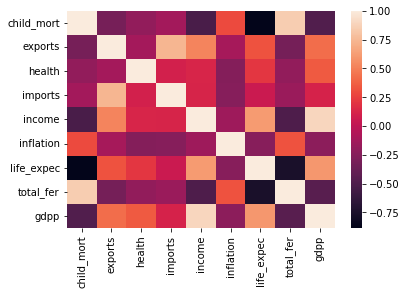

In [10]:
# to see heatmap of correlation of data
sns.heatmap(df.corr())

In [11]:
# to see any null value present in data or not
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [12]:
# to see mean of health column
df['health'].mean()

6.815688622754495

<AxesSubplot:>

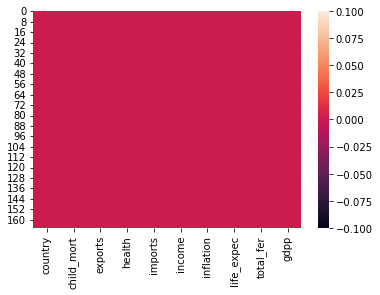

In [13]:
sns.heatmap(df.isnull())

# import MinMaxScaler

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler=MinMaxScaler()

In [16]:
# drop country column because it contain categorical data
scaled_data= scaler.fit_transform(df.drop('country', axis=1))

In [17]:
# to see data after first column we use[1:]
scaled_df=pd.DataFrame(data=scaled_data,columns=df.columns[1:])

In [18]:
scaled_df['country']=df['country']

In [19]:
scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,Afghanistan
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,Albania
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,Algeria
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,Angola
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143,Vanuatu
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650,Venezuela
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299,Vietnam
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299,Yemen


# EDA

<AxesSubplot:xlabel='total_fer', ylabel='count'>

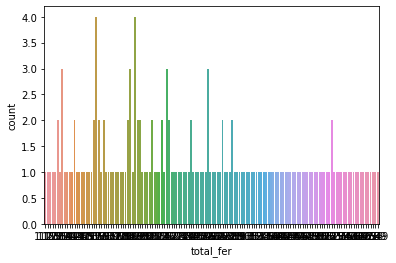

In [20]:
sns.countplot(x='total_fer',data=df)

<AxesSubplot:xlabel='health', ylabel='count'>

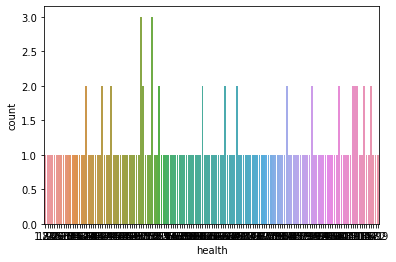

In [21]:
sns.countplot(x='health',data=df)

C:\Users\Ajit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

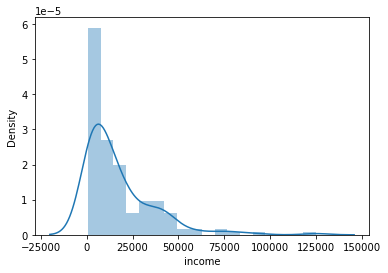

In [22]:
sns.distplot(df.income)

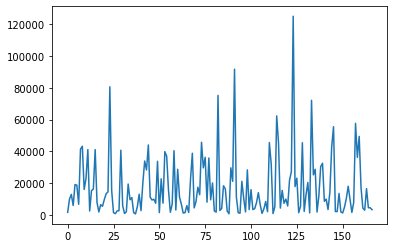

In [23]:
plt.plot('income',data=df)

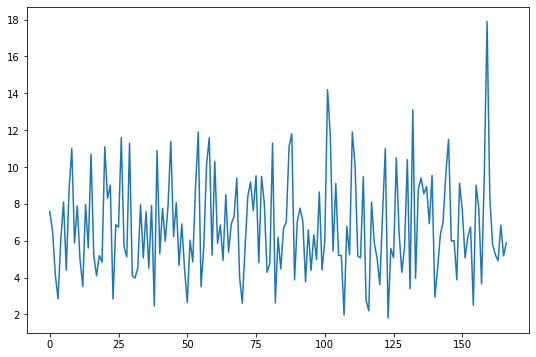

In [24]:
plt.figure(figsize=(9,6))
plt.plot('health',data=df)

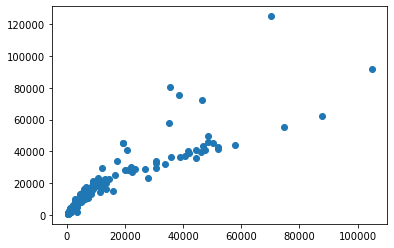

In [25]:
plt.scatter(x='gdpp',y='income',data=df)

In [26]:

data=scaled_df.drop('country',axis=1)

In [27]:
data


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


# wss choose the value of k 

In [28]:
ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters= k)
    km = km.fit(data)
    ssd.append(km.inertia_)

C:\Users\Ajit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# now code to see clusters graph

Text(0.5, 1.0, 'Elbow Method')

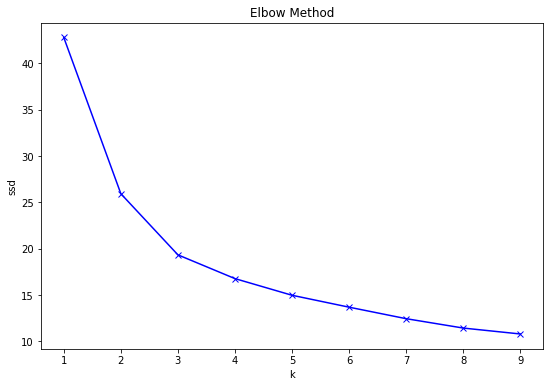

In [29]:
plt.figure(figsize=(9,6))
plt.plot(K,ssd,'bx-')
plt.xlabel('k')
plt.ylabel('ssd')
plt.title("Elbow Method")


In [30]:

kmean=KMeans(n_clusters=4)

In [31]:
kmean.fit(data)

KMeans(n_clusters=4)

In [32]:
pred=kmean.labels_ 

In [33]:
pred

array([1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 3, 2,
       3, 2, 2, 2, 2, 1, 1, 2, 2, 3, 3, 1, 1, 2, 3, 1, 3, 2, 2, 1, 1, 2,
       1, 2, 3, 2, 2, 2, 1, 0, 3, 3, 2, 3, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       3, 3, 1, 1, 3, 2, 1, 2, 2, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 3, 1, 2, 2, 3, 2, 2, 1, 2, 3, 3, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 3, 3, 2, 2, 2, 2, 2, 1, 1])

# # make scatter plot for this.
# x = gdpp
# y = income


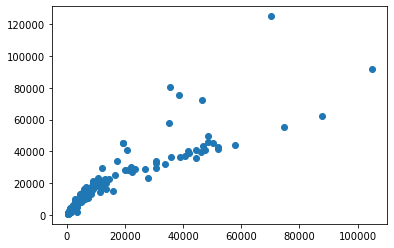

In [34]:
plt.scatter(x='gdpp',y='income',data=df)

# import PCA

In [35]:
from sklearn.decomposition import PCA


In [36]:
pca=PCA(n_components=4)
pca_model=pca.fit_transform(data)

In [37]:
data_transform = pd.DataFrame(data=pca_model,columns=['PCA1','PCA2','PCA3','PCA4'])

In [38]:
data_transform

,PCA1,PCA2,PCA3,PCA4
0,-0.599078,0.095490,0.157554,-0.024333
1,0.158474,-0.212092,-0.064189,-0.061247
2,0.003686,-0.135867,-0.134182,0.133574
3,-0.650235,0.275975,-0.142672,0.156018
4,0.200711,-0.064662,-0.100715,-0.037902
...,...,...,...,...
162,-0.160078,-0.029625,-0.121910,-0.066099
163,0.061133,-0.171339,-0.058586,0.247460
164,0.115512,-0.032034,-0.195243,-0.231993
165,-0.332968,-0.019824,-0.029989,0.105416


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr=LogisticRegression()

In [41]:
lr

LogisticRegression()

In [42]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X=df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer']]

In [45]:
y=df[['gdpp']]

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [47]:
X_train

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
13,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78
85,7.8,53.7,6.68,55.1,18300,-0.812,73.1,1.36
25,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87
84,78.9,35.4,4.47,49.3,3980,9.200,63.8,3.15
153,19.1,20.4,6.74,25.5,18000,7.010,78.2,2.15
...,...,...,...,...,...,...,...,...
63,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34
70,33.3,24.3,2.61,22.4,8430,15.300,69.9,2.48
81,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84
11,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16


In [48]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [50]:
lr.fit(X_train,y_train)

C:\Users\Ajit\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ajit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
pred=lr.predict(X_train)

In [56]:
pred

array([  9070,  46600,   1310,   1310,  19300,   1310,   1310,  46600,
        46600,  46600,   1310,  46600,  19300,  21100,   1310,   9070,
        19300,  19300,  46600,   1310,  19300,   1310,   1310,   9070,
         1310,  46600,   1310,  35300,  19300,   1310,   1310,  46600,
        19300,  46600,   1310,   9070, 105000,   1310,   9070,   1310,
         9070,   1310,  19300,   9070,   9070,   9070,   9070,   1310,
        19300,   9070,   9070,   1310,   1310,   9070,  46600,   1310,
         9070,   1310,   1310,   1310,   9070,   9070,   1310,   1310,
         9070,   1310,   1310,  19300,  19300,   1310,   1310,   1310,
         1310,   9070, 105000,   9070,  19300,   1310,   9070, 105000,
         1310,   1310,   1310,   1310,   1310,  19300,  19300,  21100,
         1310,   1310,   1310,  19300,   1310,  19300,   1310,   1310,
         9070,  19300,   1310,   1310,   9070,  19300,   1310,   1310,
        19300,   1310,  19300,   1310,  17100,  19300,   9070,  19300,
      